In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [118]:
from google.colab import files
uploaded = files.upload()

Saving burt - Copy.csv to burt - Copy.csv


In [186]:
data = pd.read_csv('burt - Copy.csv')

In [187]:
data.head(20)

,BAY,BAM,Gender,Score,RAY,RAM,RLD
0,10,1,M,5,5,5,Severe
1,10,1,F,23,6,4,Severe
2,6,10,M,60,9,2,Well
3,7,5,M,110,14,3,Well
4,10,10,M,91,12,4,Well
5,14,9,F,99,13,1,Severe
6,5,8,F,89,12,1,Well
7,13,2,F,26,6,6,Severe
8,7,7,F,33,6,11,Severe
9,9,2,M,82,11,5,Well


In [188]:
data.shape

(39676, 7)

In [189]:
data.isna().sum()

BAY       0
BAM       0
Gender    0
Score     0
RAY       0
RAM       0
RLD       0
dtype: int64

In [190]:
data['RLD'].value_counts()

Severe     26444
Well       10648
Mild        1174
Good        1170
Neutral      240
Name: RLD, dtype: int64

In [191]:
data.cov()

,BAY,BAM,Score,RAY,RAM
BAY,1.625041e+01,-4.584724e-17,0.000000e+00,-5.265269e-17,-2.865453e-17
BAM,-4.584724e-17,1.144408e+01,1.002908e-16,-3.887166e-16,-1.769417e-16
Score,0.000000e+00,1.002908e-16,9.900250e+02,8.537830e+01,-2.302810e+00
RAY,-5.265269e-17,-3.887166e-16,8.537830e+01,7.532384e+00,-1.140000e+00
RAM,-2.865453e-17,-1.769417e-16,-2.302810e+00,-1.140000e+00,1.157087e+01


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39676 entries, 0 to 39675
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAY     39676 non-null  int64 
 1   BAM     39676 non-null  int64 
 2   Gender  39676 non-null  object
 3   Score   39676 non-null  int64 
 4   RAY     39676 non-null  int64 
 5   RAM     39676 non-null  int64 
 6   RLD     39676 non-null  object
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [193]:
data['BTM'] = data['BAY']*12+data['BAM']
data['RTM'] = data['RAY']*12+data['RAM']
data['Diff'] = data['RTM']-data['BTM']

In [129]:
data.head(20)

,BAY,BAM,Gender,Score,RAY,RAM,RLD,BTM,RTM,Diff
0,10,1,M,5,5,5,Severe,121,65,-56
1,10,1,F,23,6,4,Severe,121,76,-45
2,6,10,M,60,9,2,Well,82,110,28
3,7,5,M,110,14,3,Well,89,171,82
4,10,10,M,91,12,4,Well,130,148,18
5,14,9,F,99,13,1,Severe,177,157,-20
6,5,8,F,89,12,1,Well,68,145,77
7,13,2,F,26,6,6,Severe,158,78,-80
8,7,7,F,33,6,11,Severe,91,83,-8
9,9,2,M,82,11,5,Well,110,137,27


In [130]:
data = data.drop(['BAY','BAM','RAY','RAM'], axis=1)

In [131]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['Gender', 'RLD'], dtype='object')


In [132]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [133]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [134]:
data.head(30)

,Gender,Score,RLD,BTM,RTM,Diff
0,1,5,3,121,65,-56
1,0,23,3,121,76,-45
2,1,60,4,82,110,28
3,1,110,4,89,171,82
4,1,91,4,130,148,18
5,0,99,3,177,157,-20
6,0,89,4,68,145,77
7,0,26,3,158,78,-80
8,0,33,3,91,83,-8
9,1,82,4,110,137,27


In [135]:
data.describe()

,Gender,Score,RLD,BTM,RTM,Diff
count,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000
mean,0.500000,56.000000,3.114679,143.307692,109.844037,-33.463656
std,0.500006,31.464662,0.803148,48.492299,32.693641,58.483991
min,0.000000,2.000000,0.000000,60.000000,63.000000,-164.000000
25%,0.000000,29.000000,3.000000,101.000000,80.000000,-77.000000
50%,0.500000,56.000000,3.000000,143.500000,105.000000,-33.000000
75%,1.000000,83.000000,4.000000,185.000000,138.000000,9.000000
max,1.000000,110.000000,4.000000,227.000000,171.000000,111.000000


In [136]:
data.cov()

,Gender,Score,RLD,BTM,RTM,Diff
Gender,2.500063e-01,0.000000e+00,-1.969999e-18,-2.865453e-17,0.000000e+00,7.163632e-18
Score,0.000000e+00,9.900250e+02,6.046780e+00,7.473101e-15,1.022237e+03,1.022237e+03
RLD,-1.969999e-18,6.046780e+00,6.450463e-01,-8.112615e+00,6.331887e+00,1.444450e+01
BTM,-2.865453e-17,7.473101e-15,-8.112615e+00,2.351503e+03,-1.907245e-14,-2.351503e+03
RTM,0.000000e+00,1.022237e+03,6.331887e+00,-1.907245e-14,1.068874e+03,1.068874e+03
Diff,7.163632e-18,1.022237e+03,1.444450e+01,-2.351503e+03,1.068874e+03,3.420377e+03


In [137]:
corr = data.corr()

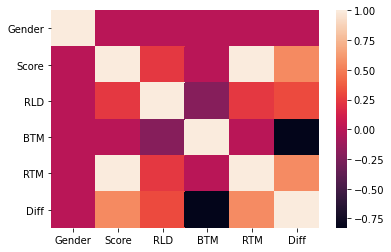

In [138]:
sns.heatmap(corr)

In [139]:
import sympy 

In [140]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 0, 0, 0,  0],
[0, 1, 0, 0, 0,  0],
[0, 0, 1, 0, 0,  0],
[0, 0, 0, 1, 0, -1],
[0, 0, 0, 0, 1,  1],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 

In [141]:
inds

(0, 1, 2, 3, 4)

In [142]:
inds = list(inds)
inds

[0, 1, 2, 3, 4]

In [143]:
for i in range(5):
    if(i not in inds):
        print(data.columns[i])

In [144]:
data.head(20)

,Gender,Score,RLD,BTM,RTM,Diff
0,1,5,3,121,65,-56
1,0,23,3,121,76,-45
2,1,60,4,82,110,28
3,1,110,4,89,171,82
4,1,91,4,130,148,18
5,0,99,3,177,157,-20
6,0,89,4,68,145,77
7,0,26,3,158,78,-80
8,0,33,3,91,83,-8
9,1,82,4,110,137,27


In [145]:
data.cov()

,Gender,Score,RLD,BTM,RTM,Diff
Gender,2.500063e-01,0.000000e+00,-1.969999e-18,-2.865453e-17,0.000000e+00,7.163632e-18
Score,0.000000e+00,9.900250e+02,6.046780e+00,7.473101e-15,1.022237e+03,1.022237e+03
RLD,-1.969999e-18,6.046780e+00,6.450463e-01,-8.112615e+00,6.331887e+00,1.444450e+01
BTM,-2.865453e-17,7.473101e-15,-8.112615e+00,2.351503e+03,-1.907245e-14,-2.351503e+03
RTM,0.000000e+00,1.022237e+03,6.331887e+00,-1.907245e-14,1.068874e+03,1.068874e+03
Diff,7.163632e-18,1.022237e+03,1.444450e+01,-2.351503e+03,1.068874e+03,3.420377e+03


In [146]:
data.cov()

,Gender,Score,RLD,BTM,RTM,Diff
Gender,2.500063e-01,0.000000e+00,-1.969999e-18,-2.865453e-17,0.000000e+00,7.163632e-18
Score,0.000000e+00,9.900250e+02,6.046780e+00,7.473101e-15,1.022237e+03,1.022237e+03
RLD,-1.969999e-18,6.046780e+00,6.450463e-01,-8.112615e+00,6.331887e+00,1.444450e+01
BTM,-2.865453e-17,7.473101e-15,-8.112615e+00,2.351503e+03,-1.907245e-14,-2.351503e+03
RTM,0.000000e+00,1.022237e+03,6.331887e+00,-1.907245e-14,1.068874e+03,1.068874e+03
Diff,7.163632e-18,1.022237e+03,1.444450e+01,-2.351503e+03,1.068874e+03,3.420377e+03


In [147]:
data = data.drop(['Gender'], axis = 1) 

In [148]:
data.head(20)

,Score,RLD,BTM,RTM,Diff
0,5,3,121,65,-56
1,23,3,121,76,-45
2,60,4,82,110,28
3,110,4,89,171,82
4,91,4,130,148,18
5,99,3,177,157,-20
6,89,4,68,145,77
7,26,3,158,78,-80
8,33,3,91,83,-8
9,82,4,110,137,27


In [149]:
corr = data.corr()

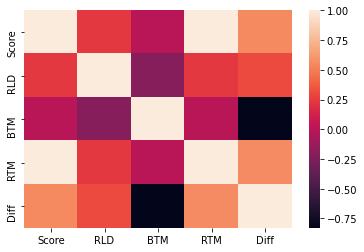

In [150]:
sns.heatmap(corr)

In [151]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [152]:
data.head()

,Score,RLD,BTM,Diff
0,5,3,121,-56
1,23,3,121,-45
2,60,4,82,28
3,110,4,89,82
4,91,4,130,18


In [153]:
data = data.drop(['Diff'], axis = 1) 

In [154]:
data.shape

(39676, 3)

In [155]:
data = data.drop_duplicates()

In [156]:
data.shape

(18312, 3)

In [157]:
data.head()

,Score,RLD,BTM
0,5,3,121
1,23,3,121
2,60,4,82
3,110,4,89
4,91,4,130


In [158]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Score,RLD,BTM
0,12,3,152
1,27,3,164
2,100,4,138
3,62,4,72
4,76,4,72


In [160]:
X=data.drop(['RLD'],axis=1).values
y=data['RLD'].values
print(X.shape, y.shape)

(18312, 2) (18312,)


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [162]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13734, 2) (13734,)
(4578, 2) (4578,)


In [163]:
from keras.utils import to_categorical

In [164]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [165]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13734, 2) (13734, 5)
(4578, 2) (4578, 5)


In [166]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [167]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_25 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_26 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_27 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_28 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
__________________________________________________

In [168]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True)

Epoch 1/100
573/573 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8928
Epoch 2/100
573/573 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9083
Epoch 3/100
573/573 [==============================] - 1s 2ms/step - loss: 0.2017 - accuracy: 0.9281
Epoch 4/100
573/573 [==============================] - 1s 2ms/step - loss: 0.1587 - accuracy: 0.9385
Epoch 5/100
573/573 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9540
Epoch 6/100
573/573 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9599
Epoch 7/100
573/573 [==============================] - 1s 1ms/step - loss: 0.0958 - accuracy: 0.9630
Epoch 8/100
573/573 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9689
Epoch 9/100
573/573 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9715
Epoch 10/100
573/573 [==============================] - 1s 2ms/step - loss: 0.0690 - accura

In [173]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9859


In [172]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.9667


In [170]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

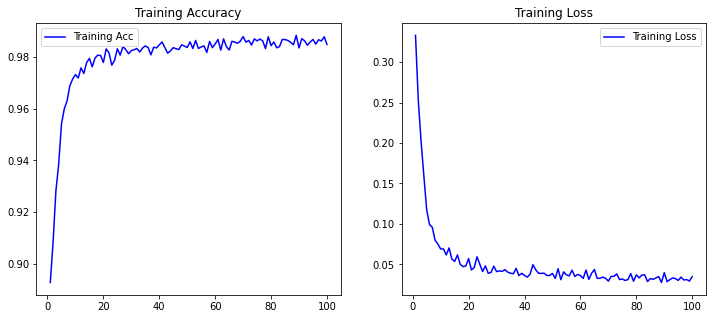

In [171]:
plot_history(history)

In [174]:
pred = model.predict([[60,31]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[0. 0. 0. 0. 1.]
5


In [175]:
print(final)

(array([4]),)


In [176]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Well


In [177]:
from keras.models import model_from_json

In [178]:
model_json = model.to_json()

In [179]:
with open("burt.json", "w") as json_file:
    json_file.write(model_json)

In [180]:
model.save_weights("burt.h5")

In [182]:
json_file = open('burt.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("burt.h5")

In [183]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_25 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_26 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_27 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_28 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
__________________________________________________

In [ ]:
import datetime
currentDate = datetime.datetime.now()
deadlineDate= datetime.datetime.strptime(deadline,'%d-%m-%Y')

daysLeft = deadlineDate - currentDate

years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)


years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)

BTM = (yearsInt*12)+monthsInt
BTM = abs(BTM)

In [194]:
data = data.drop(['BAY','BAM','BTM','Gender','RAM','RAY','Diff'], axis=1)

In [195]:
data.head()

,Score,RLD,RTM
0,5,Severe,65
1,23,Severe,76
2,60,Well,110
3,110,Well,171
4,91,Well,148


In [196]:
data = data.drop(['RLD'], axis=1)

In [197]:
data.head()

,Score,RTM
0,5,65
1,23,76
2,60,110
3,110,171
4,91,148


In [198]:
data = data.drop_duplicates()

In [199]:
X = data['Score']
y = data['RTM']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [200]:
input_dim = 1
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_33 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [201]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    verbose=True)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 13150.0967
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 11692.4346
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 10291.7705
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 8871.8779
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 7264.3311
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 5414.7866
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 3453.0762
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 1698.6609
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 741.2299
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 863.9285
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 1176.1606
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 947.5381
Epoch 13/500
4/4 [=======

In [202]:
from sklearn.metrics import mean_squared_error

In [204]:
pred = model.predict([[X_train]])
pred1 = model.predict([[X_test]])

In [205]:
mean_squared_error(y_train, pred, squared=False)

0.7187680764823344

In [218]:
mean_squared_error(y_test, pred1, squared=False)

1.2384109843223589


In [206]:
pred = model.predict([[1]])

In [207]:
pred

array([[58.778854]], dtype=float32)

In [208]:
ans = pred[0][0]
ans = int(round(ans))
ans

59

In [211]:
model_json = model.to_json()
with open("burt1.json", "w") as json_file:
    json_file.write(model_json)


In [213]:
model.save_weights("burt1.h5")

In [214]:
json_file = open('burt1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("burt1.h5")

In [215]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_33 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [216]:
loaded_model.predict([[1]])

array([[58.778854]], dtype=float32)